#### Task A
Create a Data Audit for the Pima Indians Diabetes Database. The audit should cover:


    1. Data Overview & Structure:
			- Provide a summary of the dataset.
			- Identify the number of rows and columns.
			- List all variables names and their data types.
			- Classify each variable as categorical or numerical.	

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data_path = "../data/diabetes.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset to verify it loaded correctly
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
# Provide a summary of the dataset
summary = df.describe()

# Identify the number of rows and columns
num_rows, num_columns = df.shape

# List all variable names and types
variable_types = df.dtypes

# Classify each variable as categorical or numerical
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

# Display the results
print("Summary of the dataset:")
print(summary)

print("\n\nNumber of rows:", num_rows)
print("Number of columns:", num_columns)
print("\nVariable names and their data types:")
print(variable_types)
print("\nCategorical variables:", categorical_vars)
print("Numerical variables:", numerical_vars)

Summary of the dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.

    2. Summary Statistics:
			- Compute key statistics such as mean, median, minimum, maximum, and standard deviation.
			- Create a histogram for each variable.
   			- Identify any unusual values that stand out and possible skew of the data.

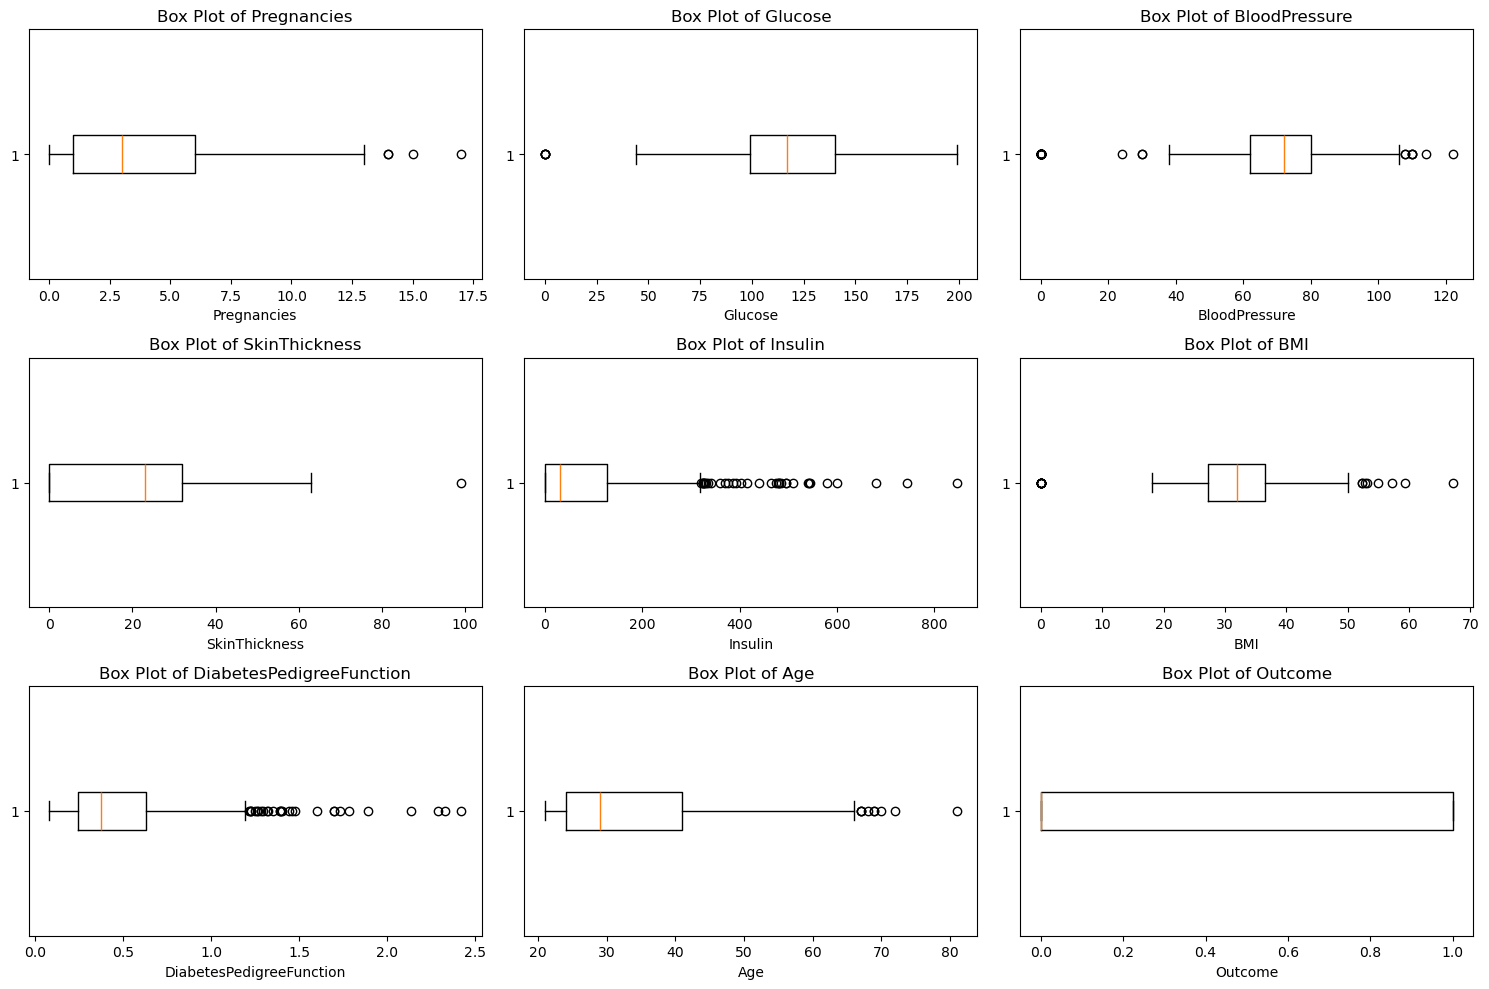

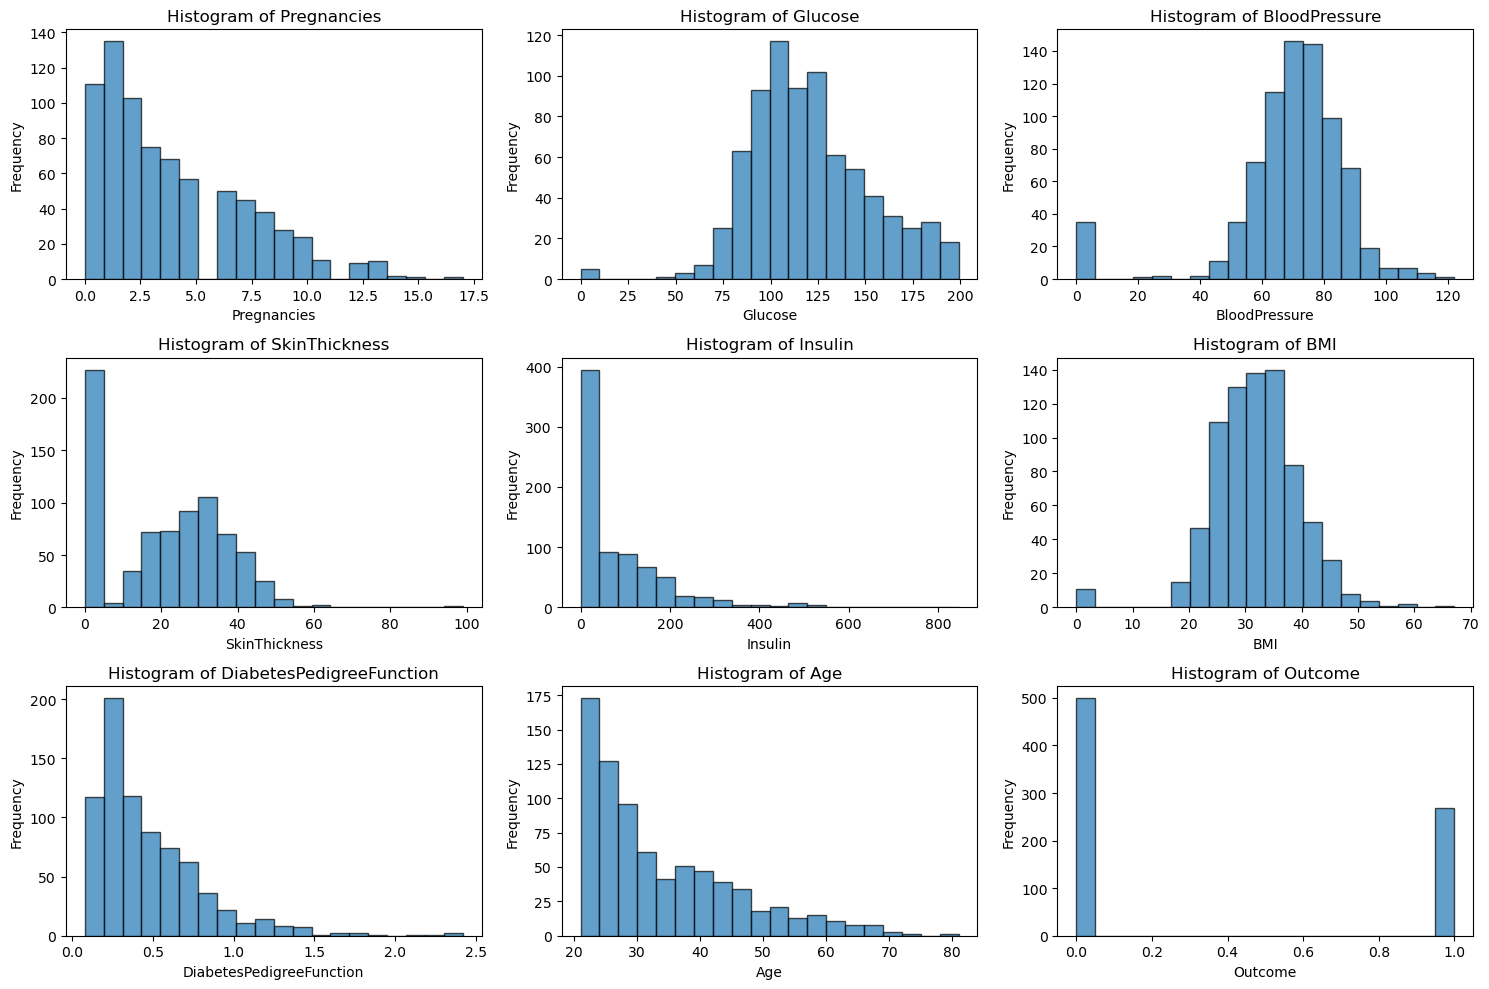

In [4]:
# Identify numerical variables
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

# Create box plots for numerical variables
plt.figure(figsize=(15, 10))

for i, var in enumerate(numerical_vars):
    plt.subplot(3, 3, i + 1)  # Adjust the number of rows and columns based on the number of numerical variables
    plt.boxplot(df[var].dropna(), vert=False)
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()


# Create histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[var].dropna(), bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

    3. Outlier:
			- Decide on a formal method to detect univariate outliers.
			- Report the number of outliers per variable.
			- Create scatterplots for each combination of variables.
			- Can you identify possible multivariate outliers that you did not detect as univariate outliers?

### Using Tukey's Fence (1.5 * IQR) to detect univariative outliers

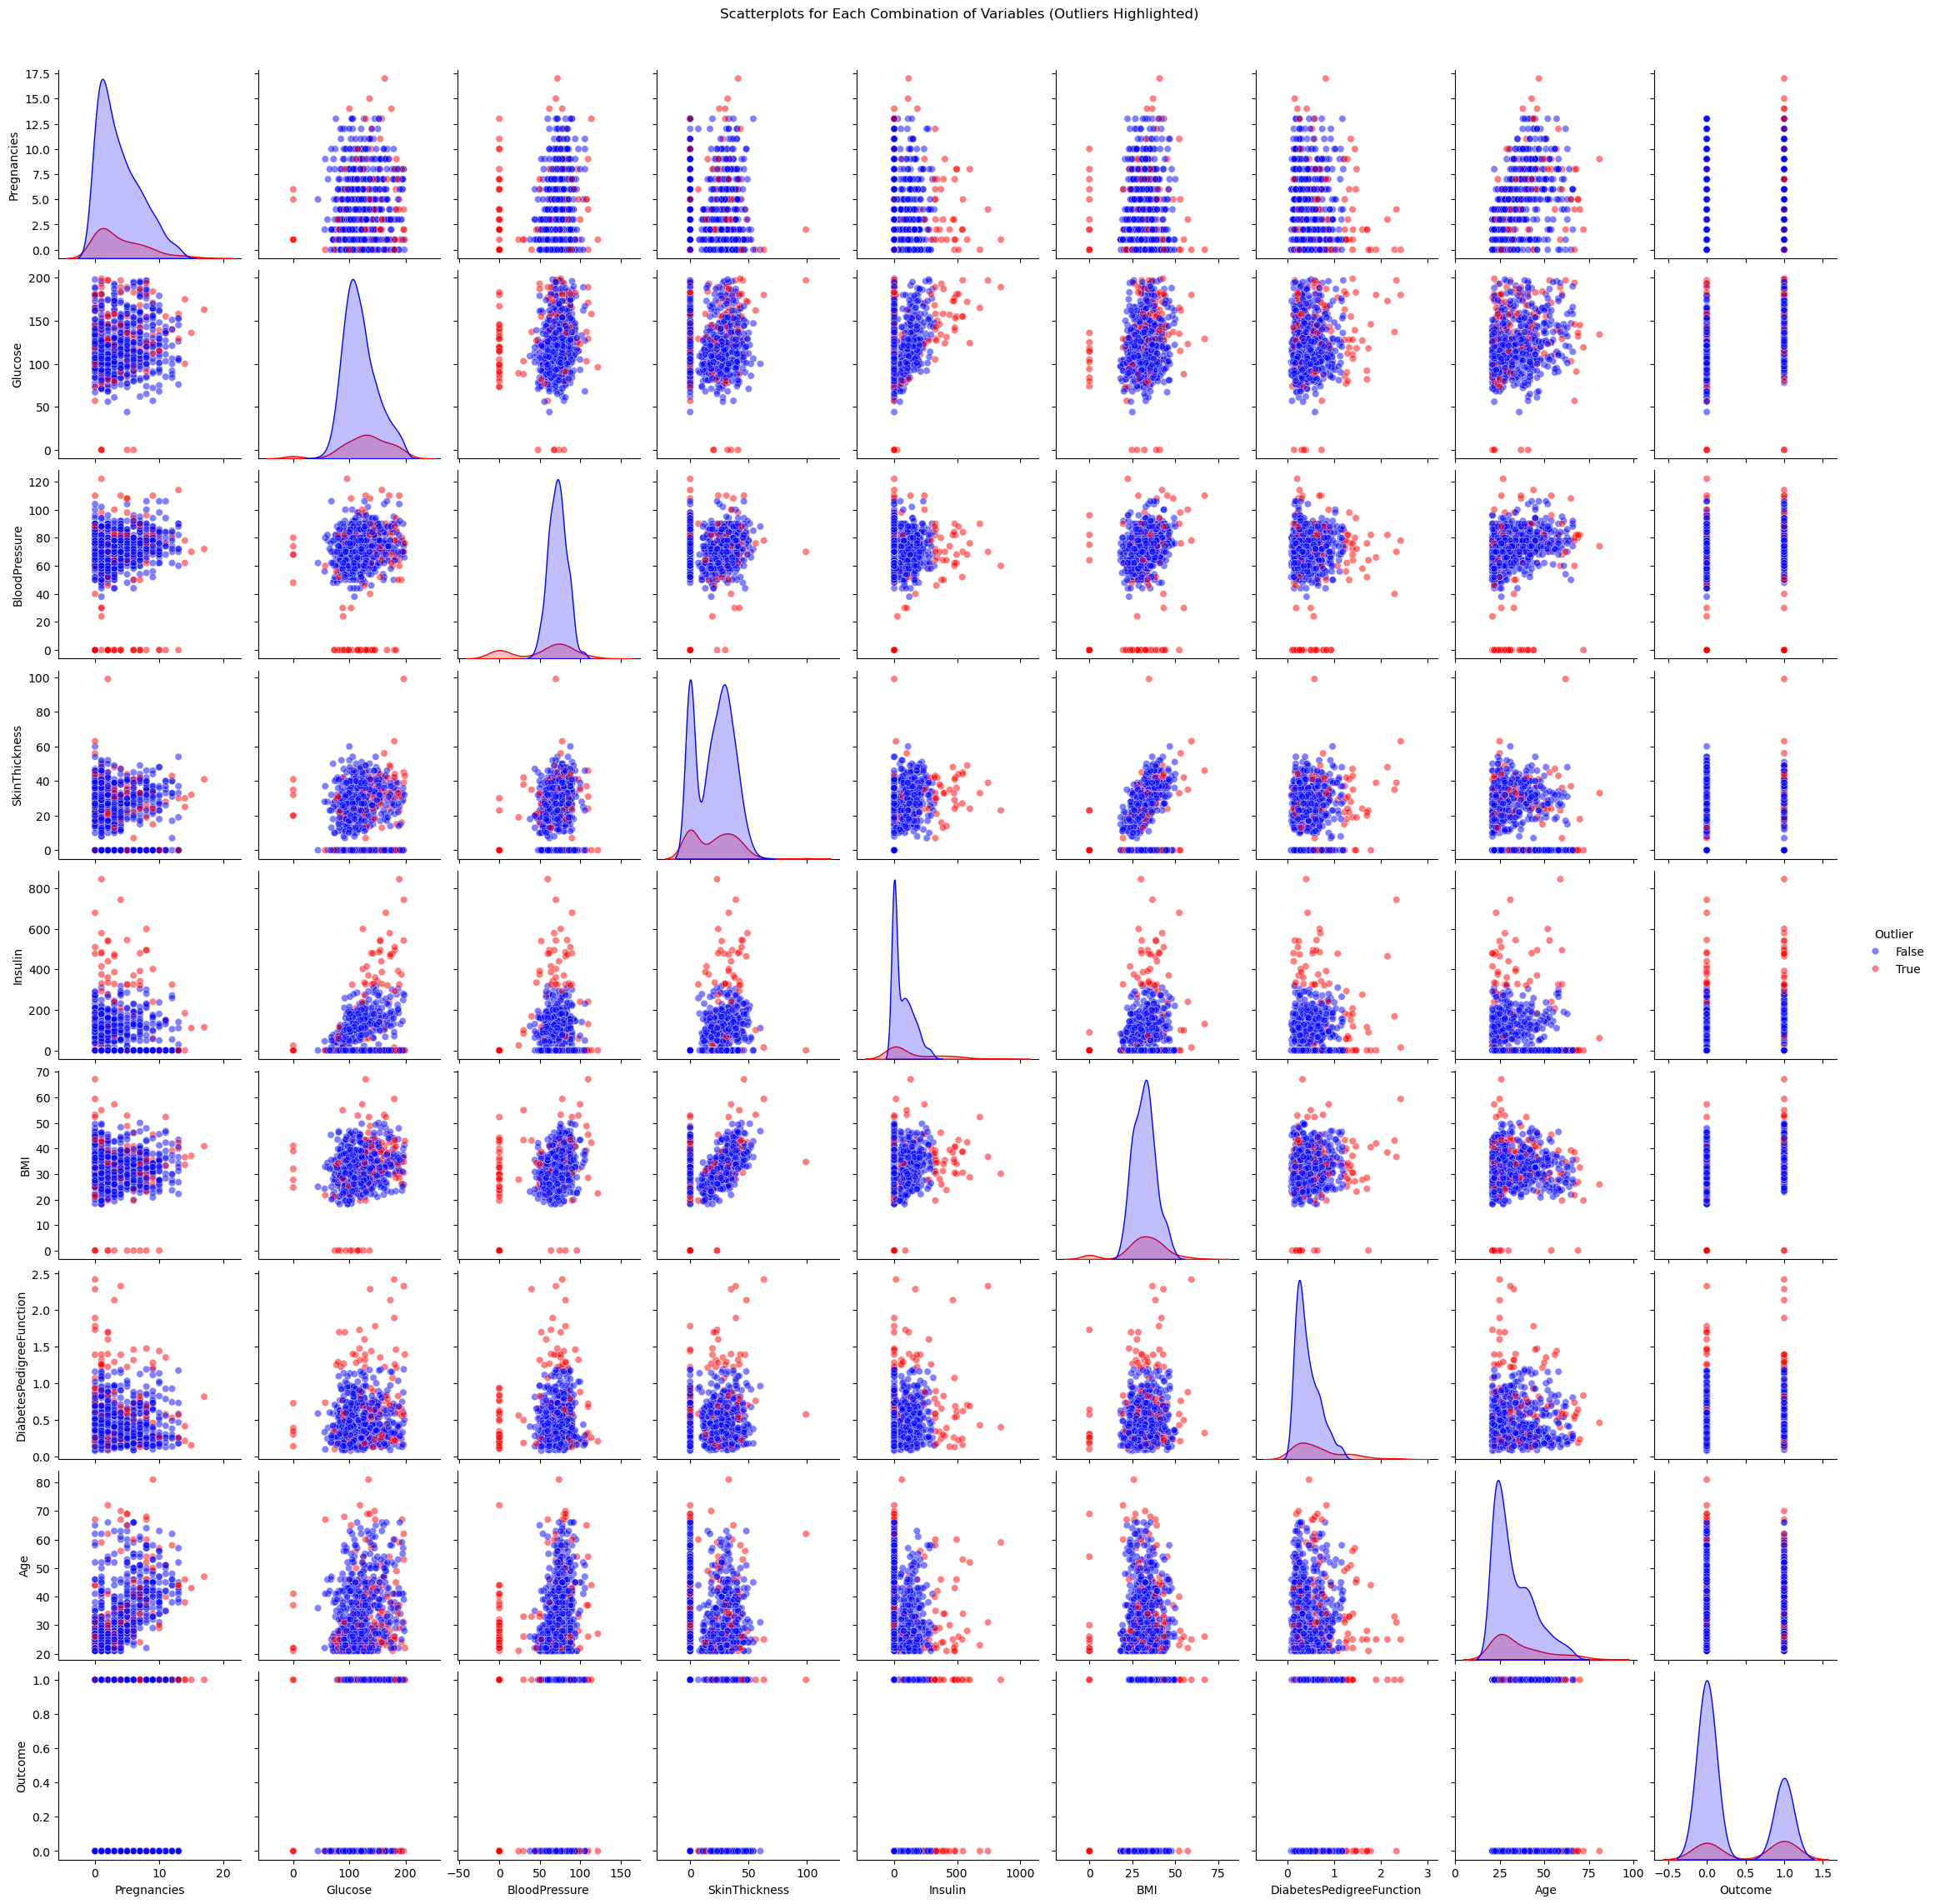

In [ ]:
# Identify numerical variables
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

# Function to detect univariate outliers using Tukey's Fence
def detect_univariate_outliers(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outliers = data[(data[variable] < lower_fence) | (data[variable] > upper_fence)]
    return outliers

# Identify univariate outliers
outliers_list = []
for var in numerical_vars:
    outliers = detect_univariate_outliers(df, var)
    outliers_list.append(outliers)

# Concatenate all outliers into a single DataFrame
outliers = pd.concat(outliers_list).drop_duplicates()

# Mark outliers in the original DataFrame
df['Outlier'] = df.index.isin(outliers.index)

# Create scatterplots for each combination of variables, highlighting outliers
sns.pairplot(df, vars=numerical_vars, hue='Outlier', palette={True: 'red', False: 'blue'}, plot_kws={'alpha': 0.5})
plt.suptitle('Scatterplots for Each Combination of Variables (Outliers Highlighted)', y=1.02)
plt.show()

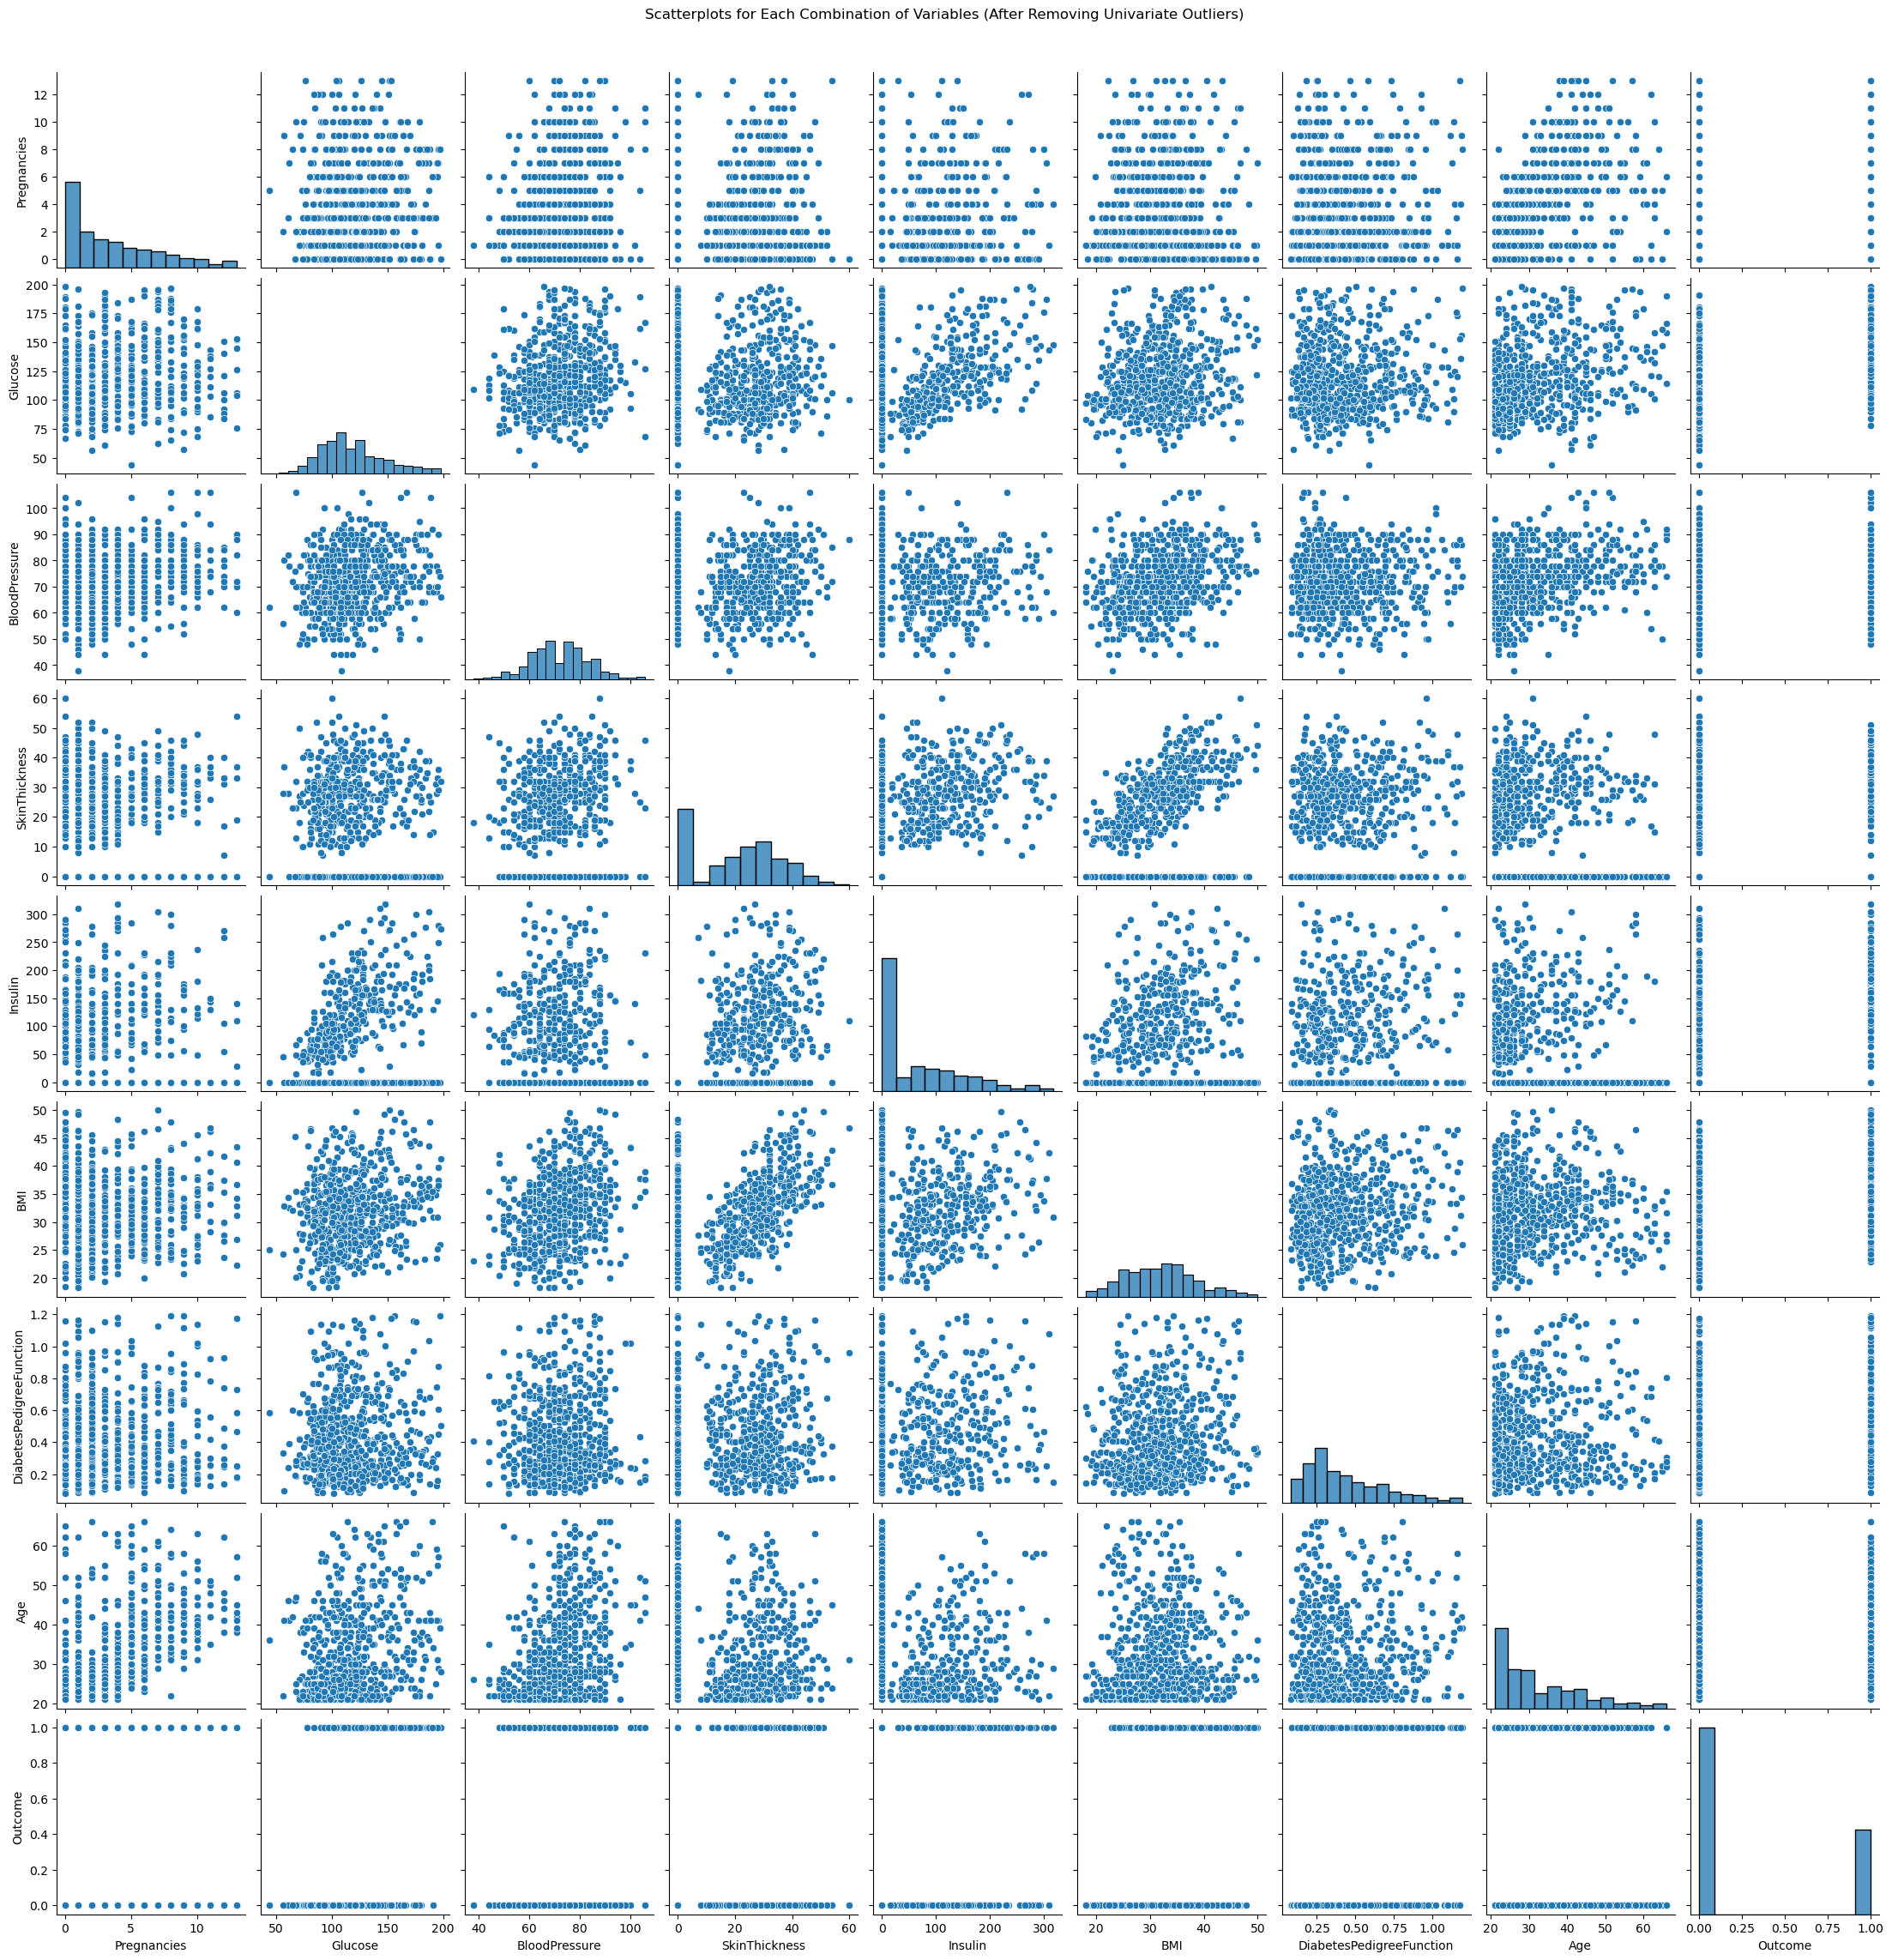

In [8]:
# Remove univariate outliers from the DataFrame
df_cleaned = df[~df.index.isin(outliers.index)]

# Create scatterplots for each combination of variables using the cleaned dataset
sns.pairplot(df_cleaned[numerical_vars])
plt.suptitle('Scatterplots for Each Combination of Variables (After Removing Univariate Outliers)', y=1.02)
plt.show()

/var/folders/1p/567_4j5x29v48vc1mvjyth400000gp/T/ipykernel_33491/2747862402.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Mahalanobis'] = calculate_mahalanobis(df_cleaned[numerical_vars], cov_matrix, mean_vector)
/var/folders/1p/567_4j5x29v48vc1mvjyth400000gp/T/ipykernel_33491/2747862402.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['MultivariateOutlier'] = df_cleaned['Mahalanobis'] > threshold


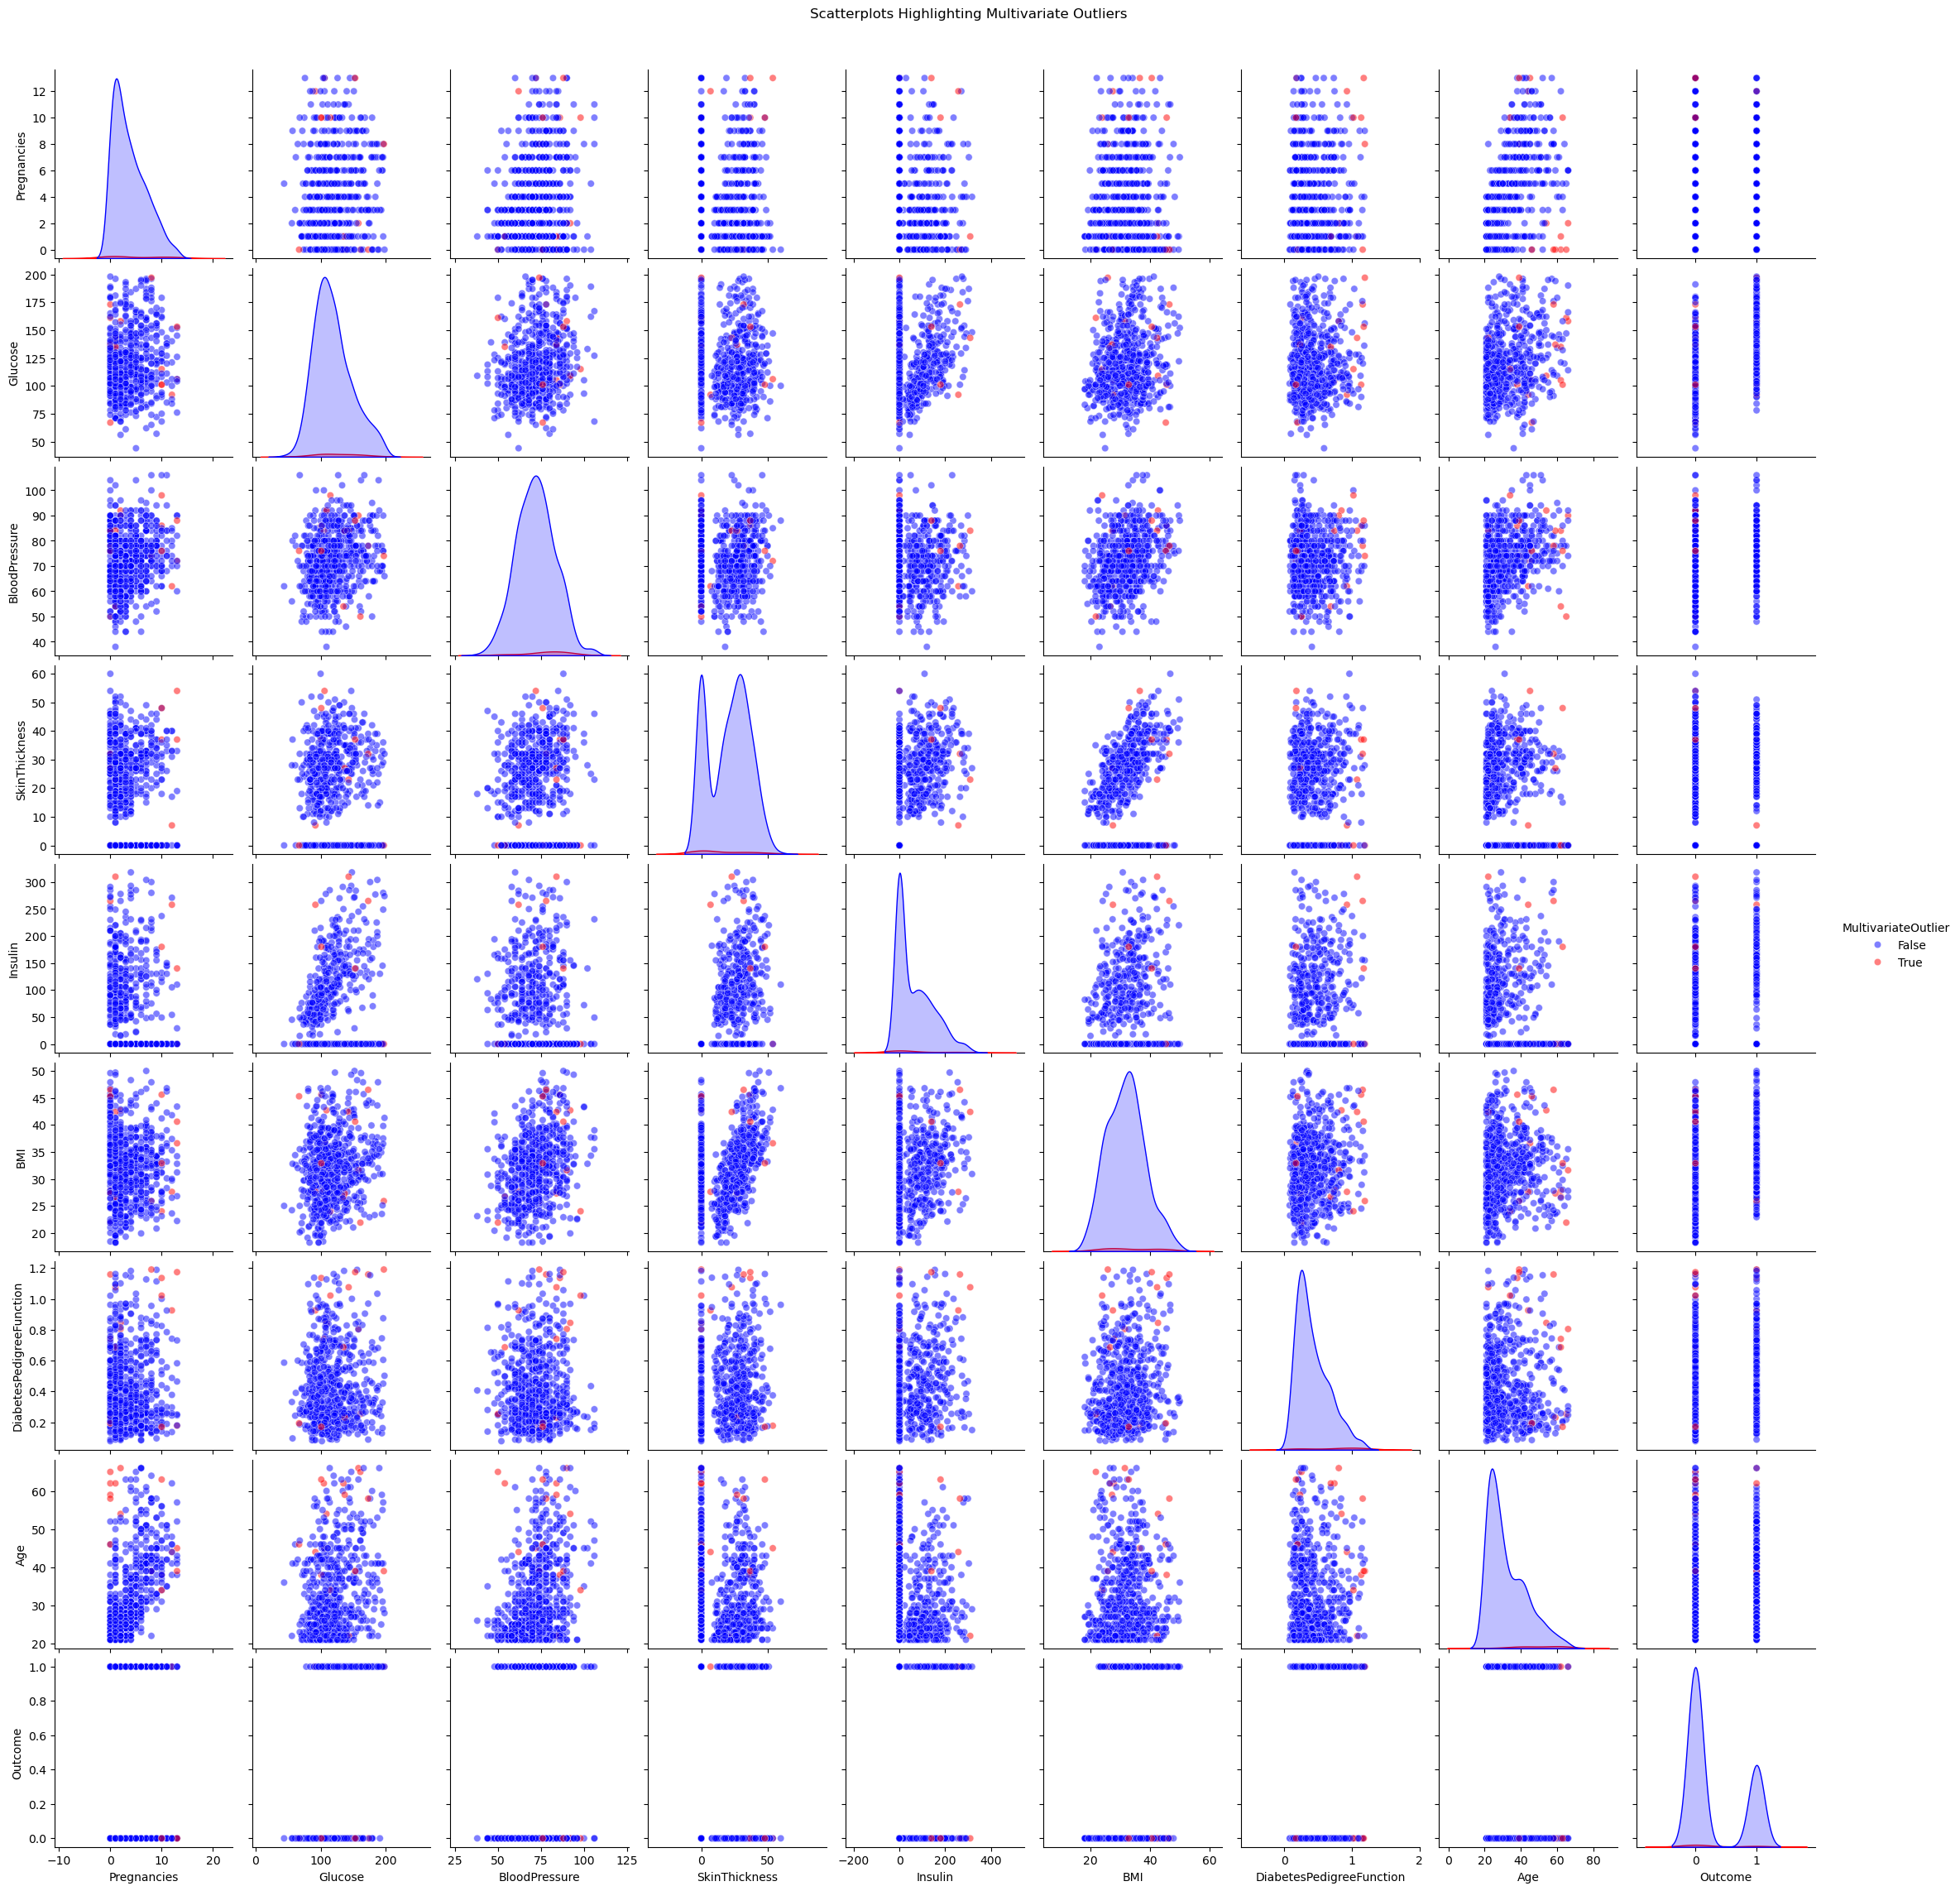

In [9]:
import numpy as np
from scipy.spatial.distance import mahalanobis

# Function to calculate Mahalanobis distance
def calculate_mahalanobis(df, cov_matrix, mean_vector):
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    distances = []
    for i in range(len(df)):
        row = df.iloc[i].values - mean_vector
        distance = np.sqrt(np.dot(np.dot(row, inv_cov_matrix), row.T))
        distances.append(distance)
    return distances

# Calculate the covariance matrix and mean vector
cov_matrix = np.cov(df_cleaned[numerical_vars].values, rowvar=False)
mean_vector = np.mean(df_cleaned[numerical_vars].values, axis=0)

# Calculate Mahalanobis distances
df_cleaned['Mahalanobis'] = calculate_mahalanobis(df_cleaned[numerical_vars], cov_matrix, mean_vector)

# Identify multivariate outliers (e.g., using a threshold)
threshold = np.percentile(df_cleaned['Mahalanobis'], 97.5)  # Adjust the threshold as needed
df_cleaned['MultivariateOutlier'] = df_cleaned['Mahalanobis'] > threshold

# Plot scatterplots highlighting multivariate outliers
sns.pairplot(df_cleaned, vars=numerical_vars, hue='MultivariateOutlier', palette={True: 'red', False: 'blue'}, plot_kws={'alpha': 0.5})
plt.suptitle('Scatterplots Highlighting Multivariate Outliers', y=1.02)
plt.show()

In [11]:
# from sklearn.ensemble import IsolationForest

# # Fit the Isolation Forest model
# iso_forest = IsolationForest(contamination=0.025)  # Adjust contamination as needed
# df_cleaned['IsoForestOutlier'] = iso_forest.fit_predict(df_cleaned[numerical_vars])

# # Convert the output to boolean (1 for inliers, -1 for outliers)
# df_cleaned['IsoForestOutlier'] = df_cleaned['IsoForestOutlier'] == -1

# # Plot scatterplots highlighting Isolation Forest outliers
# sns.pairplot(df_cleaned, vars=numerical_vars, hue='IsoForestOutlier', palette={True: 'red', False: 'blue'}, plot_kws={'alpha': 0.5})
# plt.suptitle('Scatterplots Highlighting Isolation Forest Outliers', y=1.02)
# plt.show()

In [13]:
# Remove multivariate outliers
df_final = df_cleaned[~df_cleaned['MultivariateOutlier']]

# Drop the outlier columns used for identification
df_final = df_final.drop(columns=['Mahalanobis', 'MultivariateOutlier'])

# Proceed with further analysis or modeling using the cleaned dataset
print("Number of rows after removing multivariate outliers:", df_final.shape[0])
print("Number of columns:", df_final.shape[1])

Number of rows after removing multivariate outliers: 623
Number of columns: 11


In [14]:
# Separate the outliers for further analysis
outliers = df_cleaned[df_cleaned['MultivariateOutlier']]
non_outliers = df_cleaned[~df_cleaned['MultivariateOutlier']]

# Drop the outlier columns used for identification
outliers = outliers.drop(columns=['Mahalanobis', 'MultivariateOutlier'])
non_outliers = non_outliers.drop(columns=['Mahalanobis', 'MultivariateOutlier'])

print("Number of multivariate outliers:", outliers.shape[0])
print("Number of non-outliers:", non_outliers.shape[0])

Number of multivariate outliers: 16
Number of non-outliers: 623


    4. Missing Values:
        - Identify columns with missing values.
        - Discuss possible strategies to handle the missing data.

In [ ]:
# Identify columns with missing values
missing_values = df_cleaned.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
Series([], dtype: int64)


<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Outlier  Mahalanobis  \
0           

    5. Correlations.
			- Create a correlation matrix for the dataset.
			- Visualize the correlation matrix.

Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.142093       0.210666      -0.094425   
Glucose                      0.142093  1.000000       0.238754      -0.004609   
BloodPressure                0.210666  0.238754       1.000000       0.037388   
SkinThickness               -0.094425 -0.004609       0.037388       1.000000   
Insulin                     -0.114510  0.248225      -0.041513       0.487566   
BMI                          0.036958  0.192504       0.303301       0.390340   
DiabetesPedigreeFunction     0.009289  0.066530       0.024290       0.148486   
Age                          0.567438  0.286682       0.354036      -0.143376   
Outcome                      0.227987  0.492740       0.183298       0.030676   
MultivariateOutlier          0.064951  0.050596       0.083090      -0.041830   
IsoForestOutlier             0.240161  0.154746       0.111355       0.114998   

       

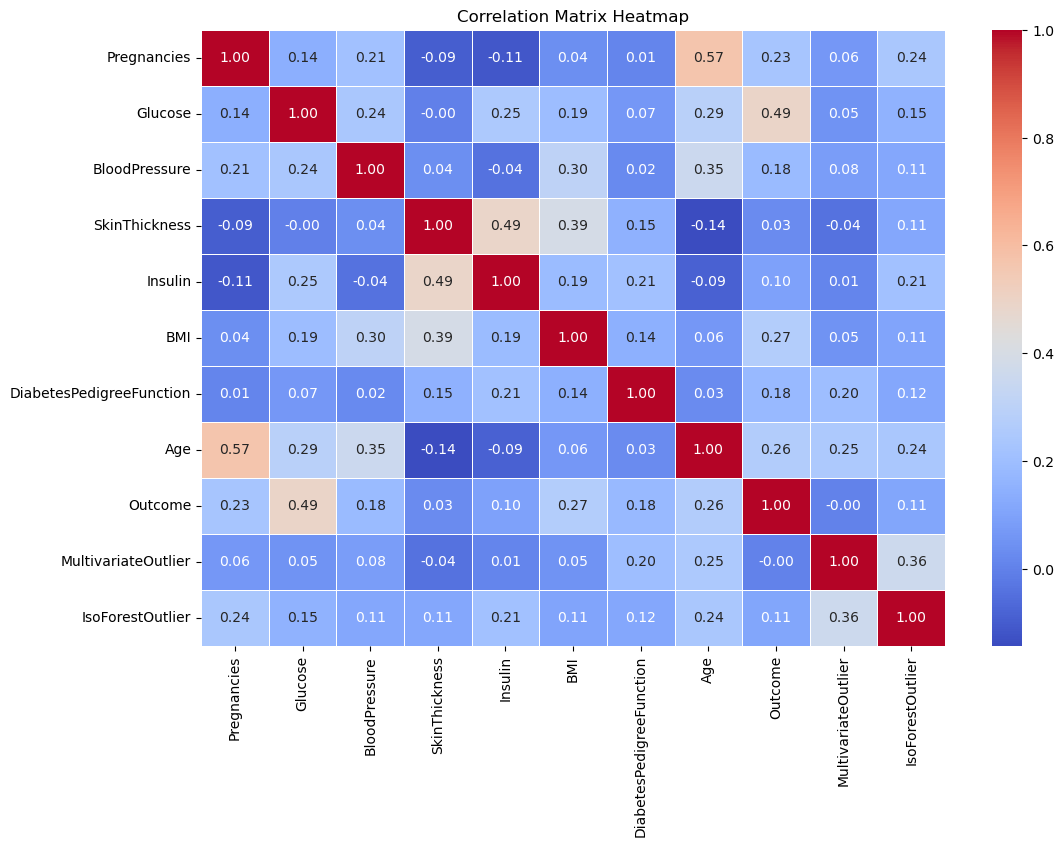

In [29]:
if 'Outlier' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['Outlier'])

if 'Mahalanobis' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['Mahalanobis'])


# Create a correlation matrix
correlation_matrix = df_cleaned.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Task B
Based on your Data Audit, prepare your data for further analysis by handling outliers and missing data.


In [30]:
# Final cleaned DataFrame ready for further analysis
df_final = df_cleaned.copy()

# Display the first few rows of the final cleaned DataFrame
print("First few rows of the final cleaned DataFrame:")
print(df_final.head())

# Save the cleaned DataFrame to a new CSV file (optional)
df_final.to_csv('cleaned_diabetes_data.csv', index=False)

First few rows of the final cleaned DataFrame:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  MultivariateOutlier  \
0                     0.627   50        1                False   
1                     0.351   31        0                False   
2                     0.672   32        1                False   
3                     0.167   21        0                False   
5                     0.201   30        0                False   

   IsoForestOutlier  
0             False  
1             False  
2             False  
3             False  
5            

#### Task C
Test different methods to sample training and test data from the dataset. Compare the sampled datasets based on the descriptive methods you have learned and evaluate which sampling method worked best.

In [31]:
# Load the cleaned data
df_final = pd.read_csv('cleaned_diabetes_data.csv')

## Define Sampling Methods

### 1. Random Sampling
Randomly split the dataset into training and test sets.

In [32]:
from sklearn.model_selection import train_test_split

# Random Sampling
train_random, test_random = train_test_split(df_final, test_size=0.2, random_state=42)

# Display descriptive statistics for the random sampling method
print("Random Sampling - Training Set:")
print(train_random.describe())
print("\nRandom Sampling - Test Set:")
print(test_random.describe())

Random Sampling - Training Set:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   511.000000  511.000000     511.000000     511.000000  511.000000   
mean      3.868885  119.798434      72.479452      20.694716   67.692759   
std       3.265451   29.107719      11.401542      15.413794   80.933993   
min       0.000000   44.000000      38.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  115.000000      72.000000      23.000000   40.000000   
75%       6.000000  138.000000      80.000000      32.000000  125.000000   
max      13.000000  198.000000     106.000000      54.000000  318.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  511.000000                511.000000  511.000000  511.000000  
mean    32.087084                  0.430112   32.994129    0.320939  
std      6.511880                  0.250959   11.209326    0.467295  
min

### 2. Stratified Sampling
Ensure that the training and test sets have the same proportion of the target variable.

In [33]:
# Stratified Sampling
train_stratified, test_stratified = train_test_split(df_final, test_size=0.2, stratify=df_final['Outcome'], random_state=42)

# Display descriptive statistics for the stratified sampling method
print("Stratified Sampling - Training Set:")
print(train_stratified.describe())
print("\nStratified Sampling - Test Set:")
print(test_stratified.describe())

Stratified Sampling - Training Set:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   511.000000  511.000000     511.000000     511.000000  511.000000   
mean      3.837573  119.011742      71.729941      19.784736   64.902153   
std       3.276631   29.107978      11.444901      15.300411   79.957183   
min       0.000000   44.000000      38.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  113.000000      72.000000      22.000000   29.000000   
75%       6.000000  136.000000      80.000000      32.000000  115.500000   
max      13.000000  198.000000     106.000000      60.000000  318.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  511.000000                511.000000  511.000000  511.000000  
mean    31.808219                  0.423875   32.816047    0.313112  
std      6.381423                  0.244141   11.210701    0.464214  

### 3. Compare the Sampled Datasets
Compare the descriptive statistics of the training and test sets for each sampling method to evaluate which method worked best.

In [34]:
# Function to compare descriptive statistics
def compare_statistics(train, test, method_name):
    print(f"{method_name} - Training Set:")
    print(train.describe())
    print(f"\n{method_name} - Test Set:")
    print(test.describe())
    print("\n" + "="*50 + "\n")

# Compare Random Sampling
compare_statistics(train_random, test_random, "Random Sampling")

# Compare Stratified Sampling
compare_statistics(train_stratified, test_stratified, "Stratified Sampling")

Random Sampling - Training Set:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   511.000000  511.000000     511.000000     511.000000  511.000000   
mean      3.868885  119.798434      72.479452      20.694716   67.692759   
std       3.265451   29.107719      11.401542      15.413794   80.933993   
min       0.000000   44.000000      38.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  115.000000      72.000000      23.000000   40.000000   
75%       6.000000  138.000000      80.000000      32.000000  125.000000   
max      13.000000  198.000000     106.000000      54.000000  318.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  511.000000                511.000000  511.000000  511.000000  
mean    32.087084                  0.430112   32.994129    0.320939  
std      6.511880                  0.250959   11.209326    0.467295  
min

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned data
df_final = pd.read_csv('cleaned_diabetes_data.csv')

# Random Sampling
train_random, test_random = train_test_split(df_final, test_size=0.2, random_state=42)

# Stratified Sampling
train_stratified, test_stratified = train_test_split(df_final, test_size=0.2, stratify=df_final['Outcome'], random_state=42)

# Function to compare descriptive statistics
def compare_statistics(train, test, method_name):
    print(f"{method_name} - Training Set:")
    print(train.describe())
    print(f"\n{method_name} - Test Set:")
    print(test.describe())
    print("\n" + "="*50 + "\n")

# Compare Random Sampling
compare_statistics(train_random, test_random, "Random Sampling")

# Compare Stratified Sampling
compare_statistics(train_stratified, test_stratified, "Stratified Sampling")

Random Sampling - Training Set:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   511.000000  511.000000     511.000000     511.000000  511.000000   
mean      3.868885  119.798434      72.479452      20.694716   67.692759   
std       3.265451   29.107719      11.401542      15.413794   80.933993   
min       0.000000   44.000000      38.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  115.000000      72.000000      23.000000   40.000000   
75%       6.000000  138.000000      80.000000      32.000000  125.000000   
max      13.000000  198.000000     106.000000      54.000000  318.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  511.000000                511.000000  511.000000  511.000000  
mean    32.087084                  0.430112   32.994129    0.320939  
std      6.511880                  0.250959   11.209326    0.467295  
min

In [41]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the model with increased max_iter
model = LogisticRegression(max_iter=1000)

# Define the K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
scores = cross_val_score(model, df_cleaned[numerical_vars], df_cleaned['Outcome'], cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))
print("Standard deviation of cross-validation scores:", np.std(scores))

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0
Standard deviation of cross-validation scores: 0.0
